In [1]:
# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

#Set Display options
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns', None)

In [2]:
data_orig = pd.read_csv(r"../data/2020-21/ML_dataset/ML_player_gameweek_history.csv" , parse_dates = ["kickoff_time"]) 
data_orig.columns


Index(['player_id', 'fixture_id', 'opponent_team_id', 'total_points',
       'home_game', 'kickoff_time', 'round', 'minutes_played', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'player_price', 'transfers_balance', 'selected',
       'transfers_in', 'transfers_out', 'team_score', 'opponent_team_score',
       'team_id', 'corners_and_indirect_freekicks_order',
       'direct_freekicks_order', 'penalties_order', 'team_short_name',
       'position_name_short', 'team_strength', 'full_name', 'opponent_team',
       'opponent_team_strength'],
      dtype='object')

In [12]:
data = data_orig.copy()
data = data[['full_name' , 'home_game' , 'kickoff_time' , 'minutes_played', 'corners_and_indirect_freekicks_order' , 'direct_freekicks_order' , 'penalties_order' , 'team_short_name' , 'position_name_short' , 'team_strength' , 'opponent_team' , 'opponent_team_strength' , 'total_points']]

#teams_in_data = ["ARS", "BUR" , "TOT" , "WOL" , "CHE" , "SHU" , "MUN" , "SOU" , "CRY" , "LIV" , "MCI" , "LEI"]
#data = data_orig[data_orig.team_name.isin(teams_in_data)]

#data = data[["player_id" , "web_name" , "player_price" ,'was_home' , "position_id", "total_points" , "minutes"  , "opponent_team_id" , "opponent_strength" , "team_id" , "kickoff_time"]]

# The day of the week with Monday=0, Sunday=6.
#data["kickoff_day"] = pd.DatetimeIndex(data["kickoff_time"]).weekday

# The hours of the datetime.
#data["kickoff_hour"] = pd.DatetimeIndex(data["kickoff_time"]).hour


data = data[data.minutes_played != 0]
data

full_name  home_game        kickoff_time  \
1     Pierre-Emerick Aubameyang      False 2020-09-12 11:30:00   
2           Alexandre Lacazette      False 2020-09-12 11:30:00   
4                    Bernd Leno      False 2020-09-12 11:30:00   
5                  Granit Xhaka      False 2020-09-12 11:30:00   
6               Héctor Bellerín      False 2020-09-12 11:30:00   
...                         ...        ...                 ...   
3125            Ademola Lookman      False 2020-10-04 13:00:00   
3126              Wesley Fofana       True 2020-11-08 14:00:00   
3127                   Ola Aina      False 2020-10-04 13:00:00   
3128       Raphael Dias Belloli       True 2020-10-19 19:00:00   
3129            Nathaniel Clyne      False 2020-10-30 20:00:00   

      minutes_played  corners_and_indirect_freekicks_order  \
1                 90                                   0.0   
2                 86                                   0.0   
4                 90                                   0.0   
5                 77                                   0.0   
6                 90                                   0.0   
...              ...                                   ...   
3125              23                                   0.0   
3126              90                                   0.0   
3127              90                                   0.0   
3128               8                                   0.0   
3129              90                                   0.0   

      direct_freekicks_order  penalties_order team_short_name  \
1                        0.0              1.0             ARS   
2                        0.0              0.0             ARS   
4                        0.0              0.0             ARS   
5                        2.0              0.0             ARS   
6                        0.0              0.0             ARS   
...                      ...              ...             ...   
3125                     0.0              2.0             FUL   
3126                     0.0              0.0             LEI   
3127                     0.0              0.0             FUL   
3128                     0.0              0.0             LEE   
3129                     0.0              0.0             CRY   

     position_name_short  team_strength opponent_team  opponent_team_strength  \
1                    MID              4           FUL                       2   
2                    FWD              4           FUL                       2   
4                    GKP              4           FUL                       2   
5                    MID              4           FUL                       2   
6                    DEF              4           FUL                       2   
...                  ...            ...           ...                     ...   
3125                 MID              2           WOL                       3   
3126                 DEF              4           WOL                       3   
3127                 DEF              2           WOL                       3   
3128                 MID              3           WOL                       3   
3129                 DEF              3           WOL                       3   

      total_points  
1                7  
2                7  
4                7  
5                3  
6                5  
...            ...  
3125             1  
3126             7  
3127             2  
3128             1  
3129             1  

[2134 rows x 13 columns]

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Normalize the numeric columns
data[['minutes_played']] = scaler.fit_transform(data[['minutes_played']])
data.head()

full_name  home_game        kickoff_time  minutes_played  \
1  Pierre-Emerick Aubameyang      False 2020-09-12 11:30:00        1.000000   
2        Alexandre Lacazette      False 2020-09-12 11:30:00        0.955056   
4                 Bernd Leno      False 2020-09-12 11:30:00        1.000000   
5               Granit Xhaka      False 2020-09-12 11:30:00        0.853933   
6            Héctor Bellerín      False 2020-09-12 11:30:00        1.000000   

   corners_and_indirect_freekicks_order  direct_freekicks_order  \
1                                   0.0                     0.0   
2                                   0.0                     0.0   
4                                   0.0                     0.0   
5                                   0.0                     2.0   
6                                   0.0                     0.0   

   penalties_order team_short_name position_name_short  team_strength  \
1              1.0             ARS                 MID              4   
2              0.0             ARS                 FWD              4   
4              0.0             ARS                 GKP              4   
5              0.0             ARS                 MID              4   
6              0.0             ARS                 DEF              4   

  opponent_team  opponent_team_strength  total_points  
1           FUL                       2             7  
2           FUL                       2             7  
4           FUL                       2             7  
5           FUL                       2             3  
6           FUL                       2             5

In [15]:
numeric_features = ['minutes_played']

data[numeric_features + ['total_points']].describe()

minutes_played  total_points
count     2134.000000   2134.000000
mean         0.798674      3.023899
std          0.324935      3.233366
min          0.000000     -4.000000
25%          0.707865      1.000000
50%          1.000000      2.000000
75%          1.000000      3.000000
max          1.000000     24.000000

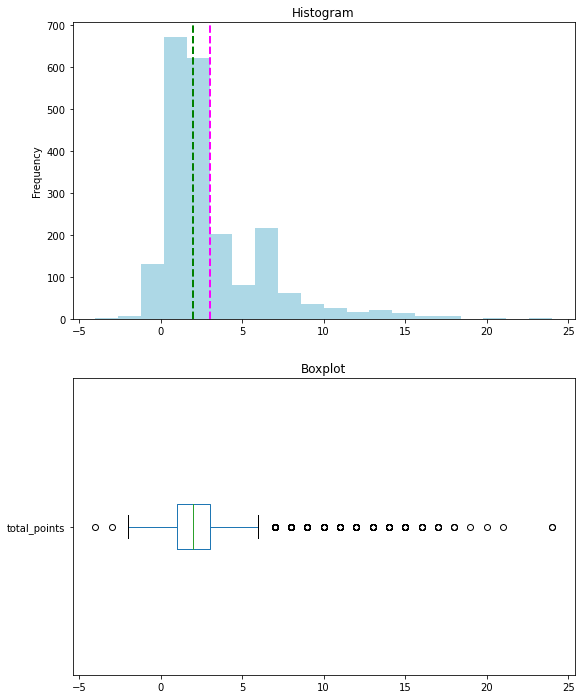

In [16]:
# Get the label column
label = data['total_points']

# Create a figure for multiple subplots
fig = plt.figure(figsize=(9,12))

# Plot a histogram
a= fig.add_subplot(2, 1, 1)
label.plot.hist(color='lightblue', bins=20)

# Show the mean and median values on the plot
plt.axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(label.median(), color='green', linestyle='dashed', linewidth=2)
a.set_title('Histogram')

# Plot a Boxplot
a=fig.add_subplot(2, 1, 2)
# create a horizontal box plot somit lines up with the histogram for comparison
label.plot(kind='box', vert=False)
a.set_title('Boxplot')

# Show the plot
plt.show()

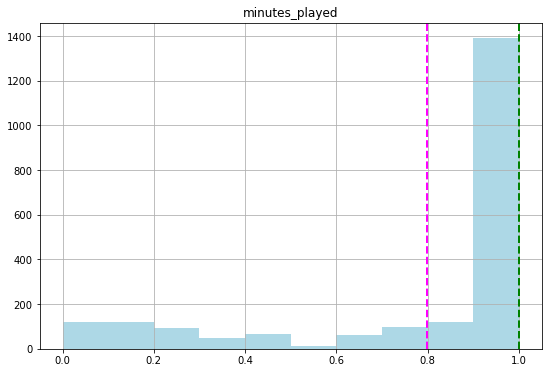

In [17]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(color='lightblue', bins=10, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='green', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

In [18]:
data.head()

full_name  home_game        kickoff_time  minutes_played  \
1  Pierre-Emerick Aubameyang      False 2020-09-12 11:30:00        1.000000   
2        Alexandre Lacazette      False 2020-09-12 11:30:00        0.955056   
4                 Bernd Leno      False 2020-09-12 11:30:00        1.000000   
5               Granit Xhaka      False 2020-09-12 11:30:00        0.853933   
6            Héctor Bellerín      False 2020-09-12 11:30:00        1.000000   

   corners_and_indirect_freekicks_order  direct_freekicks_order  \
1                                   0.0                     0.0   
2                                   0.0                     0.0   
4                                   0.0                     0.0   
5                                   0.0                     2.0   
6                                   0.0                     0.0   

   penalties_order team_short_name position_name_short  team_strength  \
1              1.0             ARS                 MID              4   
2              0.0             ARS                 FWD              4   
4              0.0             ARS                 GKP              4   
5              0.0             ARS                 MID              4   
6              0.0             ARS                 DEF              4   

  opponent_team  opponent_team_strength  total_points  
1           FUL                       2             7  
2           FUL                       2             7  
4           FUL                       2             7  
5           FUL                       2             3  
6           FUL                       2             5

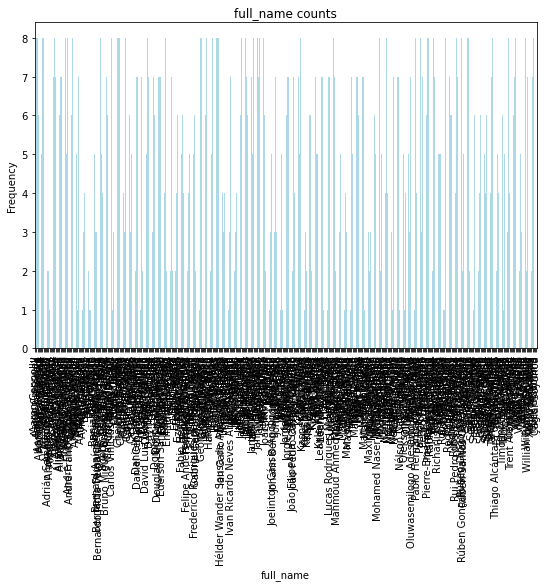

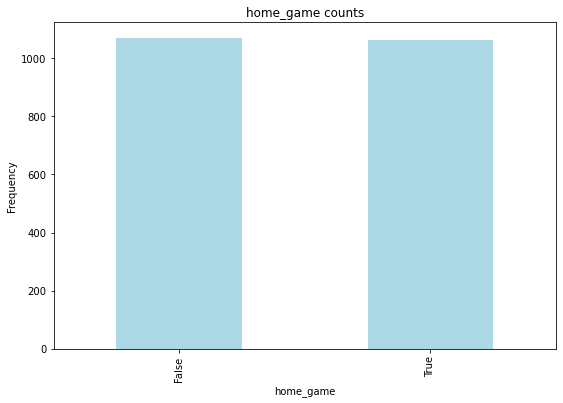

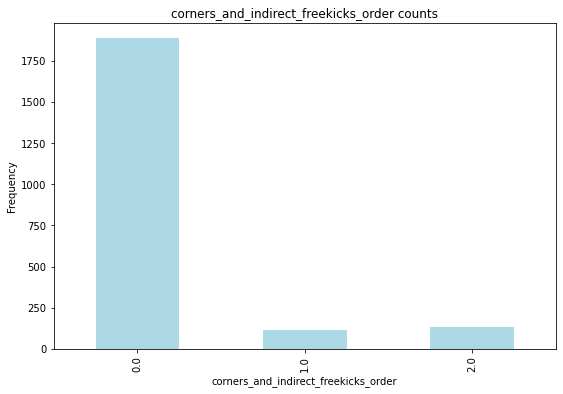

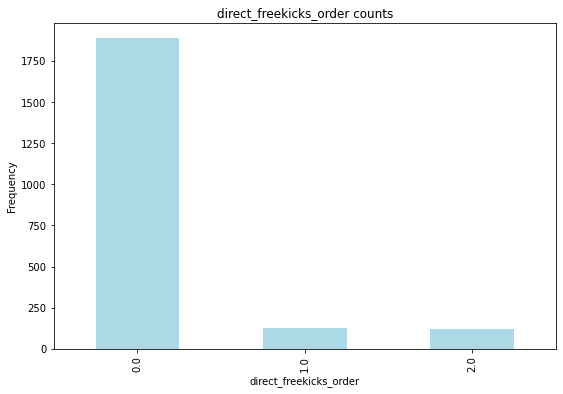

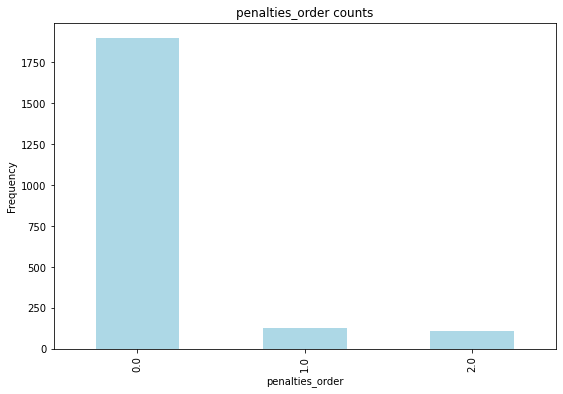

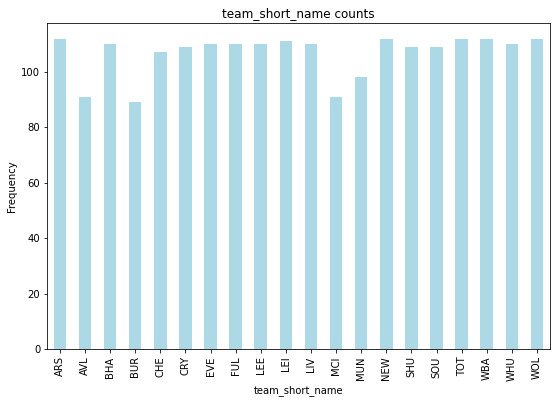

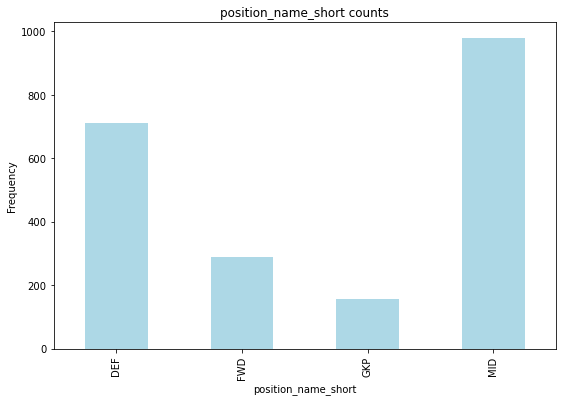

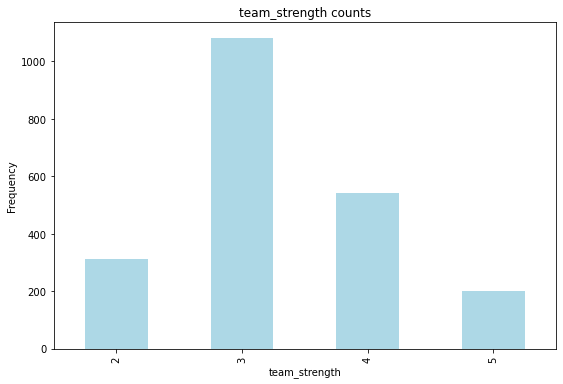

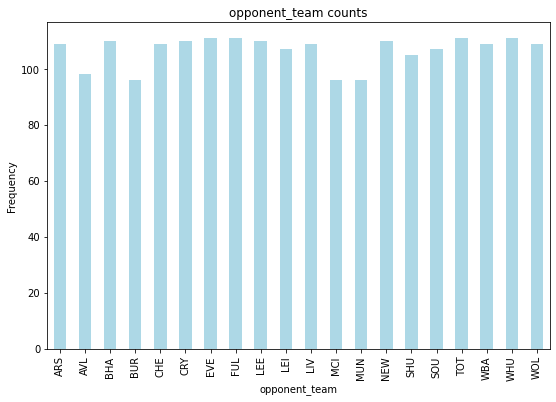

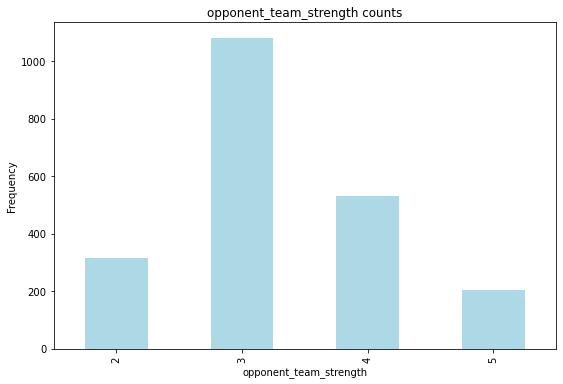

In [19]:
# plot a bar plot for each categorical feature count
categorical_features = ['full_name' , 'home_game' , 'corners_and_indirect_freekicks_order' , 'direct_freekicks_order' , 'penalties_order' , 'team_short_name' , 'position_name_short' , "team_strength" , "opponent_team" , "opponent_team_strength"]

for col in categorical_features:
    counts = data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='lightblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


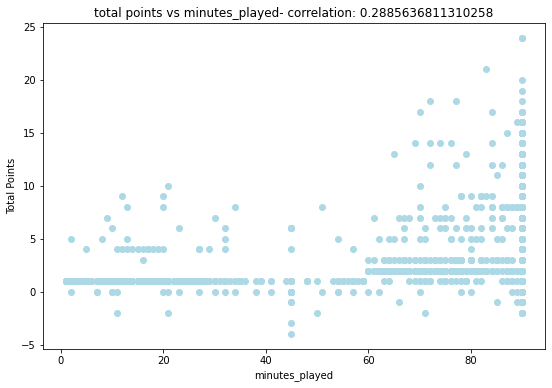

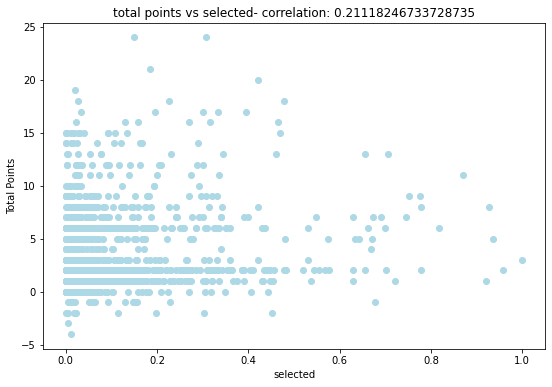

In [10]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['total_points']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label, color='lightblue')
    plt.xlabel(col)
    plt.ylabel('Total Points')
    ax.set_title('total points vs ' + col + '- correlation: ' + str(correlation))
plt.show()


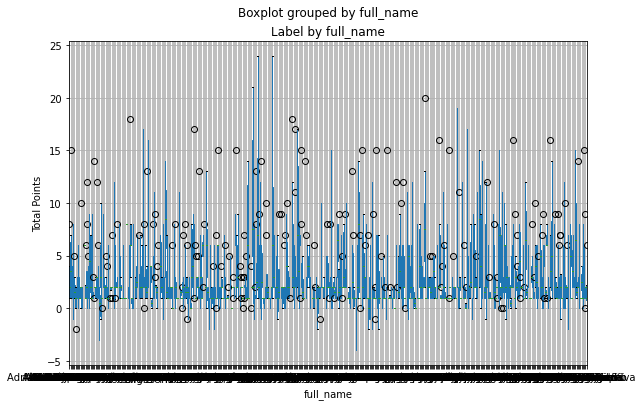

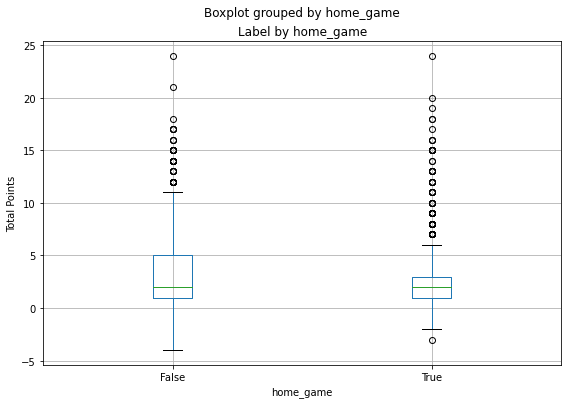

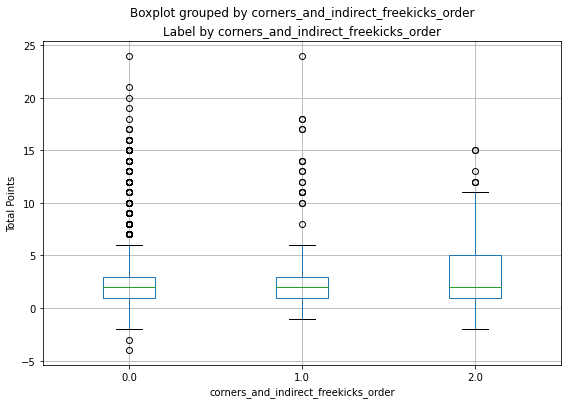

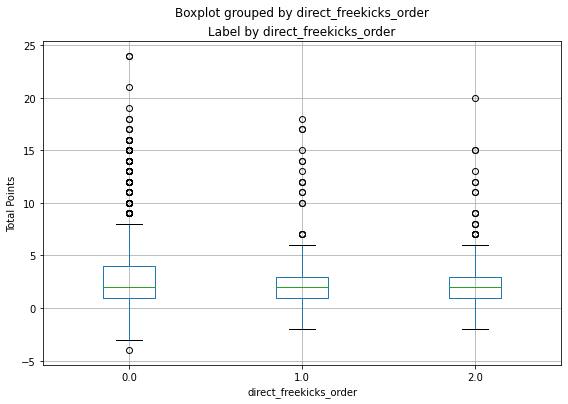

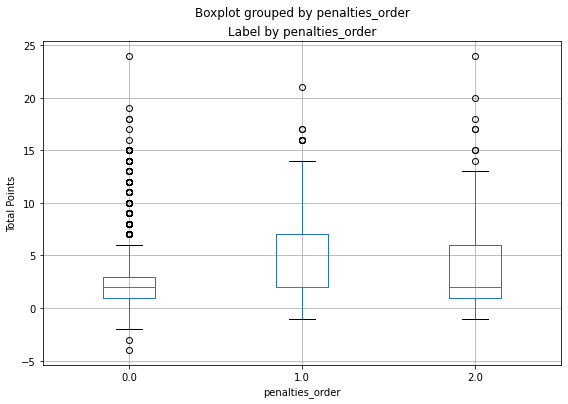

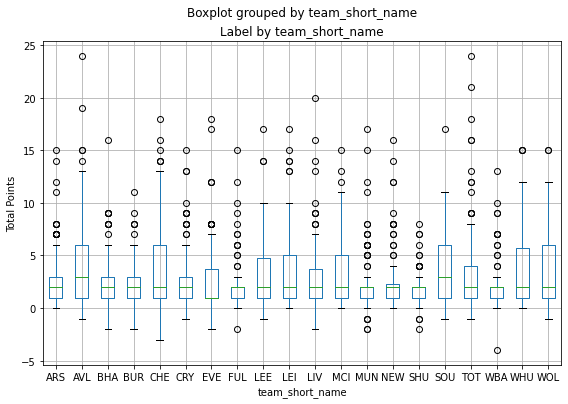

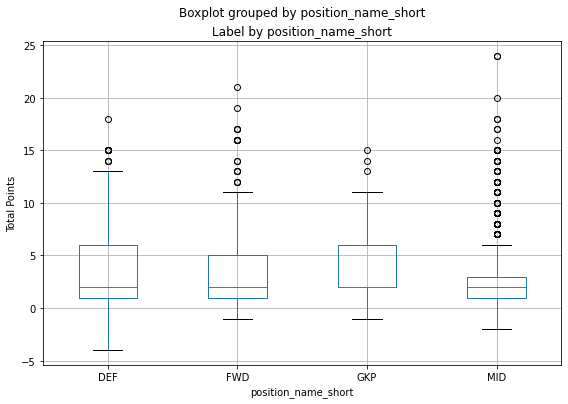

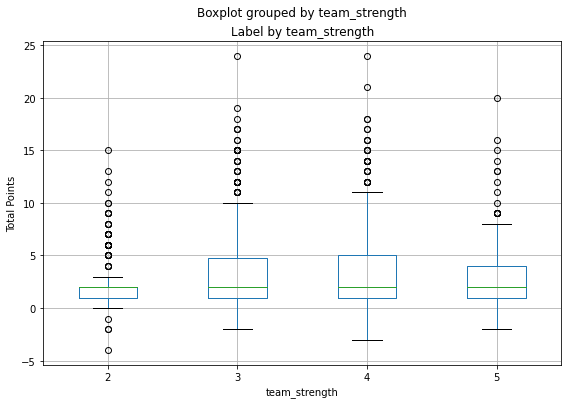

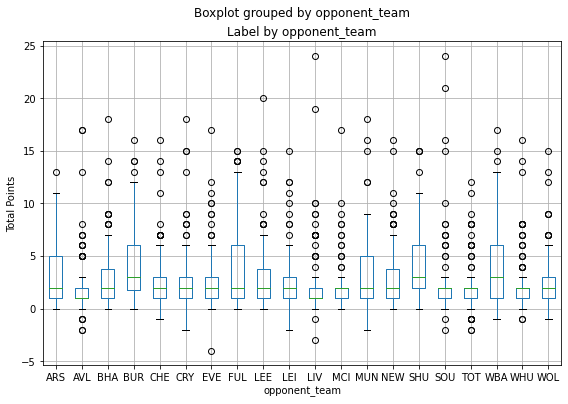

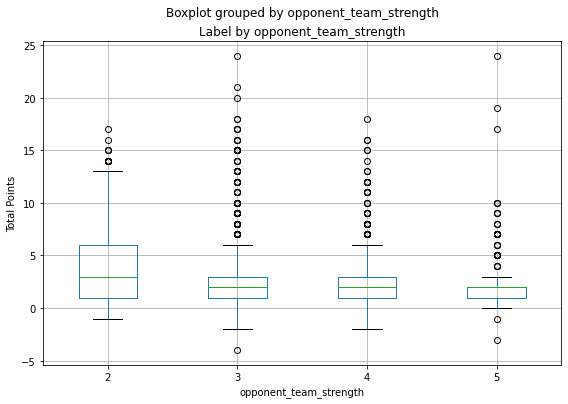

In [11]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = 'total_points', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Total Points")
plt.show()

In [157]:
# Separate features and labels
X, y = data[['position_id' , 'opponent_team_id' , 'was_home', 'opponent_strength' , 'team_id' , 'kickoff_hour' , 'player_price' , 'minutes']].values, data['total_points'].values
np.set_printoptions(edgeitems=10)
np.core.arrayprint._line_width = 1000
np.set_printoptions(suppress=True)
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[3 16 True 3 5 14 0.24444444444444452 0.9176470588235296]
 [3 2 True 2 17 16 0.41111111111111115 1.0]
 [3 2 True 2 17 16 0.24444444444444452 0.9647058823529413]
 [1 16 True 3 5 14 0.07777777777777778 1.0]
 [3 2 True 2 17 16 0.18888888888888894 0.6823529411764707]
 [4 16 True 3 5 14 0.3 1.0]
 [3 2 True 2 17 16 0.13333333333333336 1.0]
 [4 16 True 3 5 14 0.3 0.9176470588235296]
 [2 2 True 2 17 16 0.18888888888888894 1.0]
 [4 2 True 2 17 16 0.8 1.0]]

Labels:
[ 3  5  1  8  2  2  5 13  2 13]


In [158]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.size, X_test.size))

Training Set: 34272, rows
Test Set: 14696 rows


In [159]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression(normalize=False).fit(X_train, y_train)
print (model)

LinearRegression()


In [160]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [7. 4. 5. 1. 1. 3. 0. 4. 4. 4.]
Actual labels   :  [21 20  1  1  6  2  1  1  2  6]


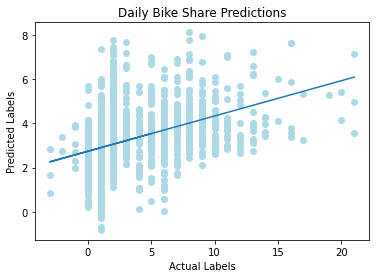

In [161]:
plt.scatter(y_test, predictions, color="lightblue")
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test))
plt.show()

In [162]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 8.719767804142158
RMSE: 2.952925296065269
R2: 0.14399713169886497


In [163]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression(normalize=False))])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', LinearRegression())])


Predicted labels:  [7. 4. 5. 1. 1. 4. 0. 4. 3. 5.]
Actual labels:  [21 20  1  1  6  2  1  1  2  6]
MSE: 8.727051442132423
RMSE: 2.954158330579528
R2: 0.14328211093783383


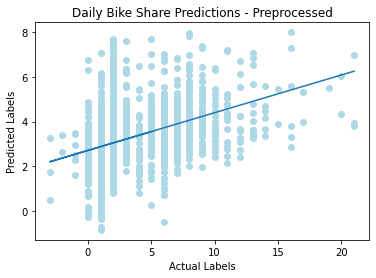

In [164]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels: ' ,y_test[:10])

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, predictions, color='lightblue')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test))
plt.show()

In [165]:
from sklearn.ensemble import GradientBoostingRegressor

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', GradientBoostingRegressor())])


# train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


MSE: 8.403463557473634
RMSE: 2.8988728080882806
R2: 0.17504811246872765


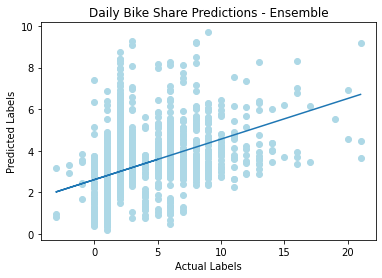

In [166]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, predictions, color='lightblue')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Ensemble')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test))
plt.show()